In [1]:
#Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read Study data files
bank_loans = pd.read_csv("data/cleaned_data/cleaned_bank_loan_modeling.csv")
bank_loans.head()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Education Level,Value of Mortgage,Personal Loan
0,25,1,49000,91107,4,1600,Undergrad,0,No
1,45,19,34000,90089,3,1500,Undergrad,0,No
2,39,15,11000,94720,1,1000,Undergrad,0,No
3,35,9,100000,94112,1,2700,Graduate,0,No
4,35,8,45000,91330,4,1000,Graduate,0,No


In [3]:
bank_loans.groupby("Personal Loan").mean()


,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Value of Mortgage
Personal Loan,,,,,,,
No,45.367257,20.132301,66237.389381,93152.428761,2.373451,1729.008850,51789.380531
Yes,45.066667,19.843750,144745.833333,93153.202083,2.612500,3905.354167,100845.833333


In [4]:
bank_loans.corr()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Value of Mortgage
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539
Years Work Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383
Family Size,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445
Monthly Credit Card Spending,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905
Value of Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000


In [5]:
bank_loans.groupby("Education Level").mean()


,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Value of Mortgage
Education Level,,,,,,,
Advanced/Professional,46.140573,20.471686,66122.584943,93041.968688,2.381079,1723.391073,54178.547635
Graduate,45.039914,19.770492,64313.613685,93278.676408,2.652174,1685.089095,51319.315752
Undergrad,44.963740,20.065363,85586.354962,93147.202767,2.236164,2260.830153,61627.385496


In [6]:
grouped = bank_loans.groupby("Age")
spending = grouped["Monthly Credit Card Spending"]
spending.mean()

Age
23    2510.833333
24    2028.571429
25    1796.792453
26    2292.564103
27    1744.285714
28    1846.019417
29    1939.105691
30    1933.161765
31    1953.040000
32    2124.250000
33    2255.750000
34    2182.985075
35    2084.304636
36    2129.065421
37    2078.301887
38    1876.869565
39    1869.624060
40    1944.320000
41    2029.338235
42    1949.365079
43    2107.852349
44    2127.768595
45    2311.811024
46    2385.196850
47    2118.495575
48    1848.389831
49    1776.000000
50    1534.855072
51    1590.077519
52    1977.241379
53    1655.357143
54    1920.629371
55    1791.040000
56    1827.481481
57    1789.696970
58    1943.356643
59    1861.363636
60    1842.519685
61    1818.196721
62    1681.056911
63    1998.240741
64    1555.641026
65    1957.125000
66    1182.083333
67    1300.000000
Name: Monthly Credit Card Spending, dtype: float64

In [7]:
grouped = bank_loans.groupby("Age")
Income = grouped[["Income","Monthly Credit Card Spending"]]
Income.mean()

,Income,Monthly Credit Card Spending
Age,,
23,67250.000000,2510.833333
24,74214.285714,2028.571429
25,66981.132075,1796.792453
26,84051.282051,2292.564103
27,80802.197802,1744.285714
28,80970.873786,1846.019417
29,81056.910569,1939.105691
30,77286.764706,1933.161765
31,70824.000000,1953.040000


In [8]:
x_axis_age = bank_loans['Age']
x_axis_age


0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64

In [9]:
y_axix_income = bank_loans['Income']
y_axix_income

0        49000
1        34000
2        11000
3       100000
4        45000
         ...  
4995     40000
4996     15000
4997     24000
4998     49000
4999     83000
Name: Income, Length: 5000, dtype: int64

In [10]:
Experience = bank_loans['Years Work Experience']
Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Years Work Experience, Length: 5000, dtype: int64

In [11]:
Credit_card = bank_loans['Monthly Credit Card Spending']
Credit_card

0       1600
1       1500
2       1000
3       2700
4       1000
        ... 
4995    1900
4996     400
4997     300
4998     500
4999     800
Name: Monthly Credit Card Spending, Length: 5000, dtype: int64

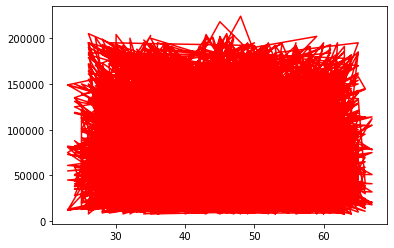

In [12]:
income_curve, = plt.plot(x_axis_age, y_axix_income, color="red")

In [13]:
grouped = bank_loans.groupby("Personal Loan")
loan = grouped[["Income","Monthly Credit Card Spending"]]
loan.count()


,Income,Monthly Credit Card Spending
Personal Loan,,
No,4520,4520
Yes,480,480


In [15]:
bank_loans.dtypes

Age                              int64
Years Work Experience            int64
Income                           int64
ZIP Code                         int64
Family Size                      int64
Monthly Credit Card Spending     int64
Education Level                 object
Value of Mortgage                int64
Personal Loan                   object
dtype: object

In [16]:
bank_loans.describe()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Value of Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,45.338400,20.104600,73774.200000,93152.503000,2.396400,1937.93800,56498.800000
std,11.463166,11.467954,46033.729321,2121.852197,1.147663,1747.65898,101713.802102
min,23.000000,-3.000000,8000.000000,9307.000000,1.000000,0.00000,0.000000
25%,35.000000,10.000000,39000.000000,91911.000000,1.000000,700.00000,0.000000
50%,45.000000,20.000000,64000.000000,93437.000000,2.000000,1500.00000,0.000000
75%,55.000000,30.000000,98000.000000,94608.000000,3.000000,2500.00000,101000.000000
max,67.000000,43.000000,224000.000000,96651.000000,4.000000,10000.00000,635000.000000


In [17]:
bank_loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Years Work Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73774.2000,46033.729321,8000.0,39000.0,64000.0,98000.0,224000.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family Size,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
Monthly Credit Card Spending,5000.0,1937.9380,1747.658980,0.0,700.0,1500.0,2500.0,10000.0
Value of Mortgage,5000.0,56498.8000,101713.802102,0.0,0.0,0.0,101000.0,635000.0


In [18]:
#association between Personal loan and different characteristics

In [19]:
bank_loans = bank_loans[["Personal Loan", "Age", "Income", "Years Work Experience", "Family Size", 
                         "Monthly Credit Card Spending", "Value of Mortgage", ]].copy()

In [20]:
bank_loans.corr()

,Age,Income,Years Work Experience,Family Size,Monthly Credit Card Spending,Value of Mortgage
Age,1.000000,-0.055269,0.994215,-0.046418,-0.052012,-0.012539
Income,-0.055269,1.000000,-0.046574,-0.157501,0.645984,0.206806
Years Work Experience,0.994215,-0.046574,1.000000,-0.052563,-0.050077,-0.010582
Family Size,-0.046418,-0.157501,-0.052563,1.000000,-0.109275,-0.020445
Monthly Credit Card Spending,-0.052012,0.645984,-0.050077,-0.109275,1.000000,0.109905
Value of Mortgage,-0.012539,0.206806,-0.010582,-0.020445,0.109905,1.000000


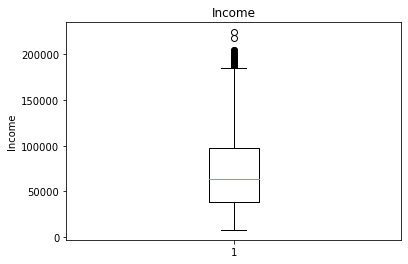

In [21]:
bank_loans = pd.read_csv("data/cleaned_data/cleaned_bank_loan_modeling.csv")
Incomes = bank_loans['Income']
fig1, ax1 = plt.subplots()
ax1.set_title('Income')
ax1.set_ylabel('Income')
ax1.boxplot(Incomes)
plt.savefig("data/cleaned_data/boxplot")
plt.show()

In [22]:
quartiles = Incomes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Income is: {lowerq}")
print(f"The upper quartile of Income is: {upperq}")
print(f"The interquartile range of Income is: {iqr}")
print(f"The the median of Income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Income is: 39000.0
The upper quartile of Income is: 98000.0
The interquartile range of Income is: 59000.0
The the median of Income is: 64000.0 
Values below -49500.0 could be outliers.
Values above 186500.0 could be outliers.


In [23]:
mean_numpy = np.mean(Incomes)
print(f"The mean Income is {mean_numpy}")

median_numpy = np.median(Incomes)
print(f"The median Income is {median_numpy}")



The mean Income is 73774.2
The median Income is 64000.0


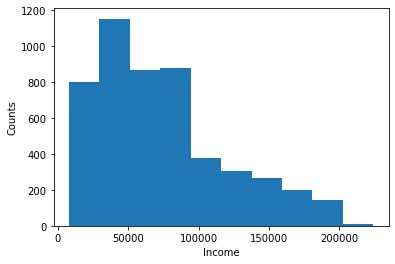

NormaltestResult(statistic=6.109819270270222, pvalue=0.04712697920102689)


In [24]:
plt.hist(Incomes)
plt.xlabel('Income')
plt.ylabel('Counts')
plt.savefig("data/cleaned_data/income_histogram")
plt.show()
print(st.normaltest(Incomes.sample(65)))

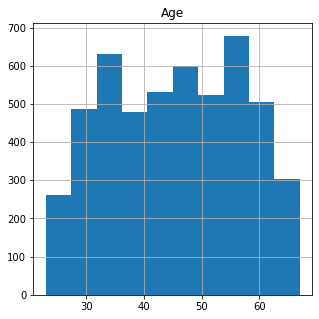

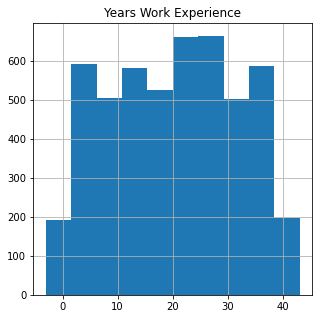

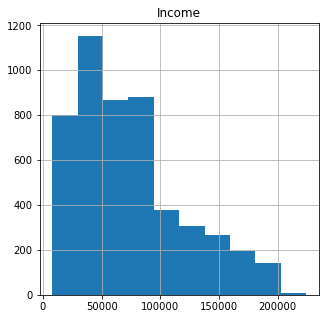

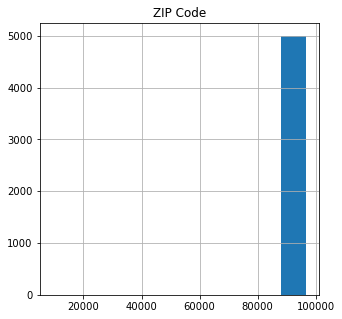

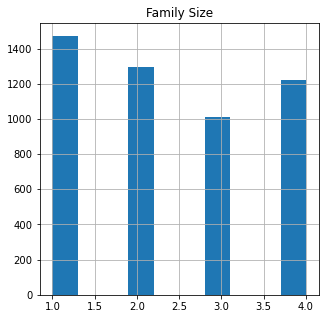

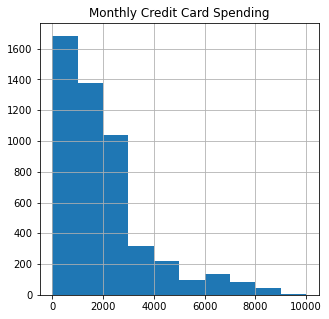

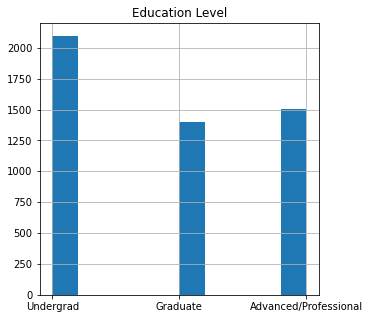

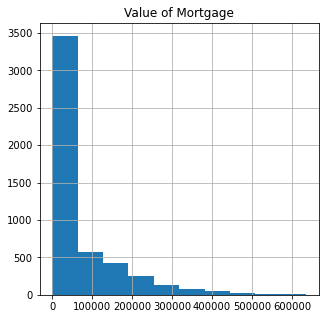

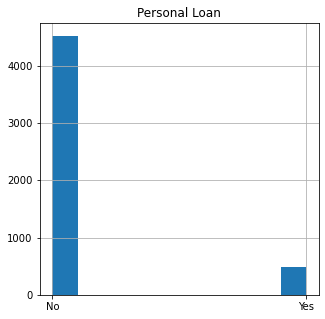

In [51]:
plt.rcParams["figure.figsize"] = (5,5)
for histogram in bank_loans.columns:
    if histogram !='ID':
        bank_loans[histogram].hist()
        plt.title(histogram)
        plt.savefig("data/cleaned_data/income_age_boxplot")
        plt.show()


In [26]:
bank_loans.groupby(["Personal Loan"]).count()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Education Level,Value of Mortgage
Personal Loan,,,,,,,,
No,4520,4520,4520,4520,4520,4520,4520,4520
Yes,480,480,480,480,480,480,480,480


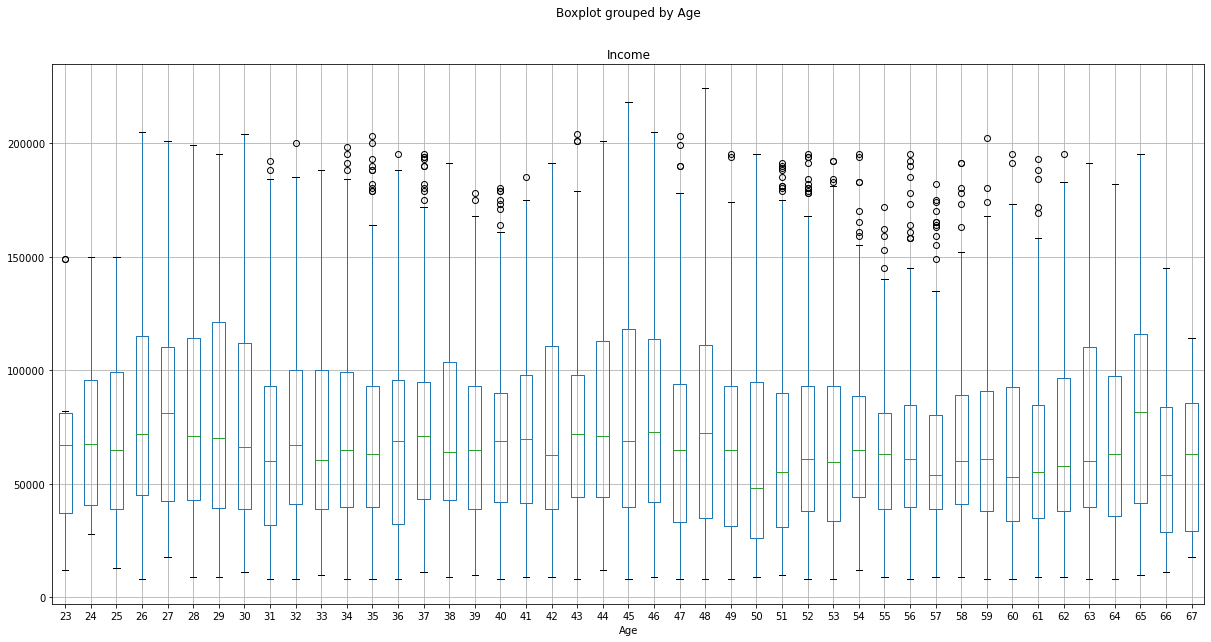

In [27]:
bank_loans.boxplot("Income", by="Age", figsize=(20, 10))
plt.savefig("data/cleaned_data/income_age_boxplot")

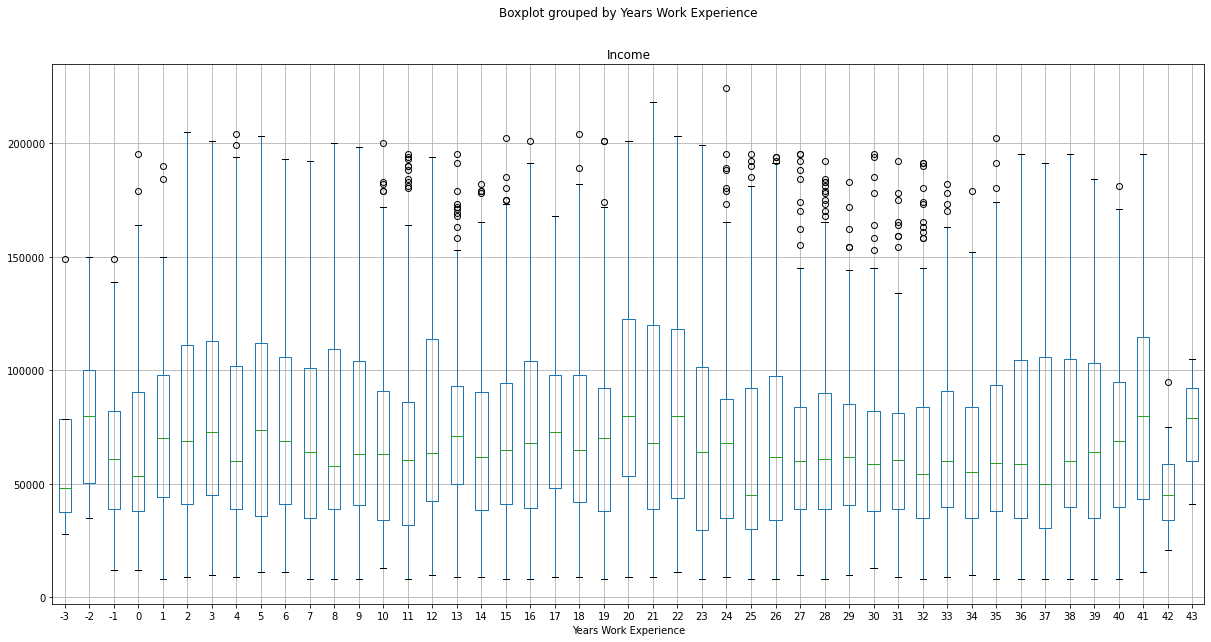

In [28]:
bank_loans.boxplot("Income", by="Years Work Experience", figsize=(20, 10))
plt.savefig("data/cleaned_data/experience_income_boxplot")

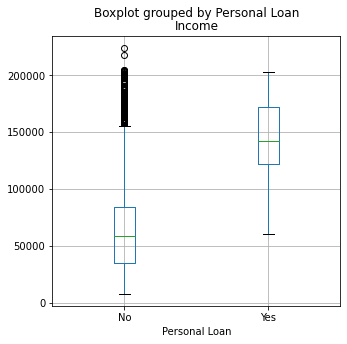

In [29]:
bank_loans.boxplot("Income", by="Personal Loan", figsize=(5, 5))
plt.savefig("data/cleaned_data/loan_income_boxplot")

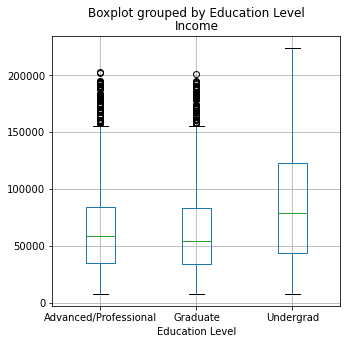

In [30]:
bank_loans.boxplot("Income", by="Education Level", figsize=(5, 5))
plt.savefig("data/cleaned_data/education_boxplot")

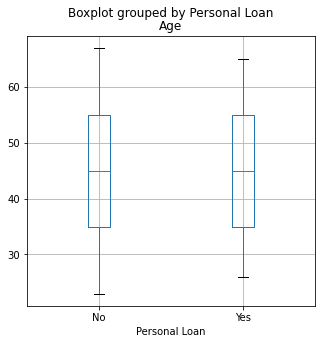

In [31]:
bank_loans.boxplot("Age", by="Personal Loan", figsize=(5, 5))
plt.savefig("data/cleaned_data/age_boxplot")

In [32]:
bank_loans_Y = bank_loans[bank_loans['Personal Loan'] == 'Yes']
bank_loans_N = bank_loans[bank_loans['Personal Loan'] == 'No']

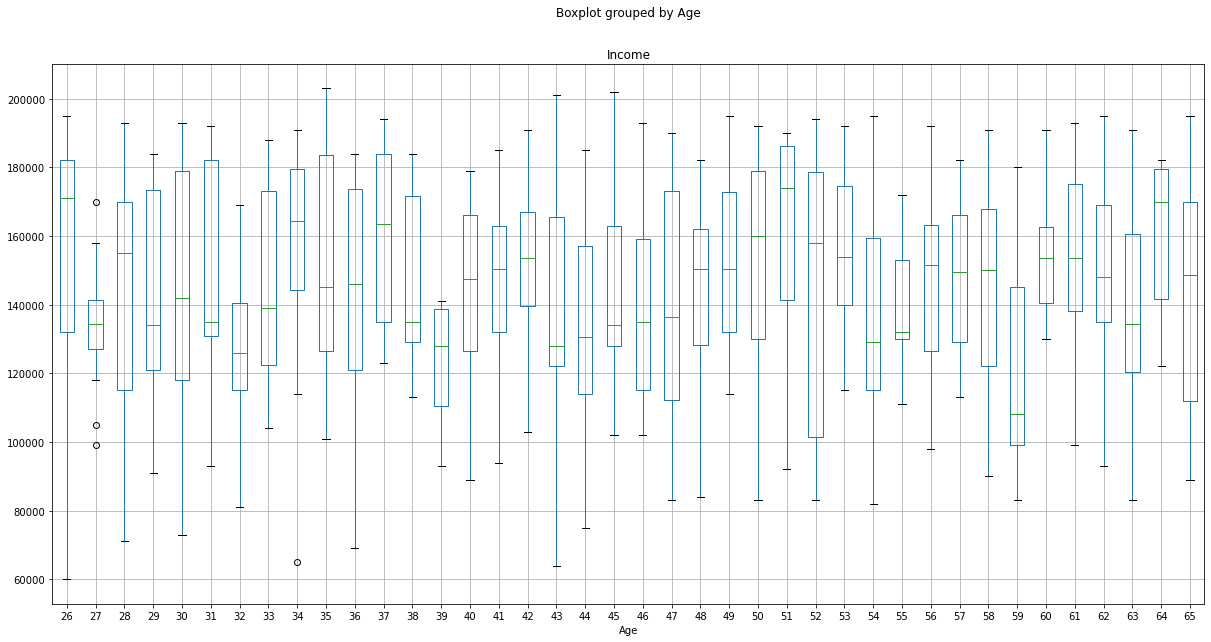

In [33]:
bank_loans_Y.boxplot("Income", by="Age", figsize=(20, 10))
plt.savefig("data/cleaned_data/loan_yes_income_boxplot")

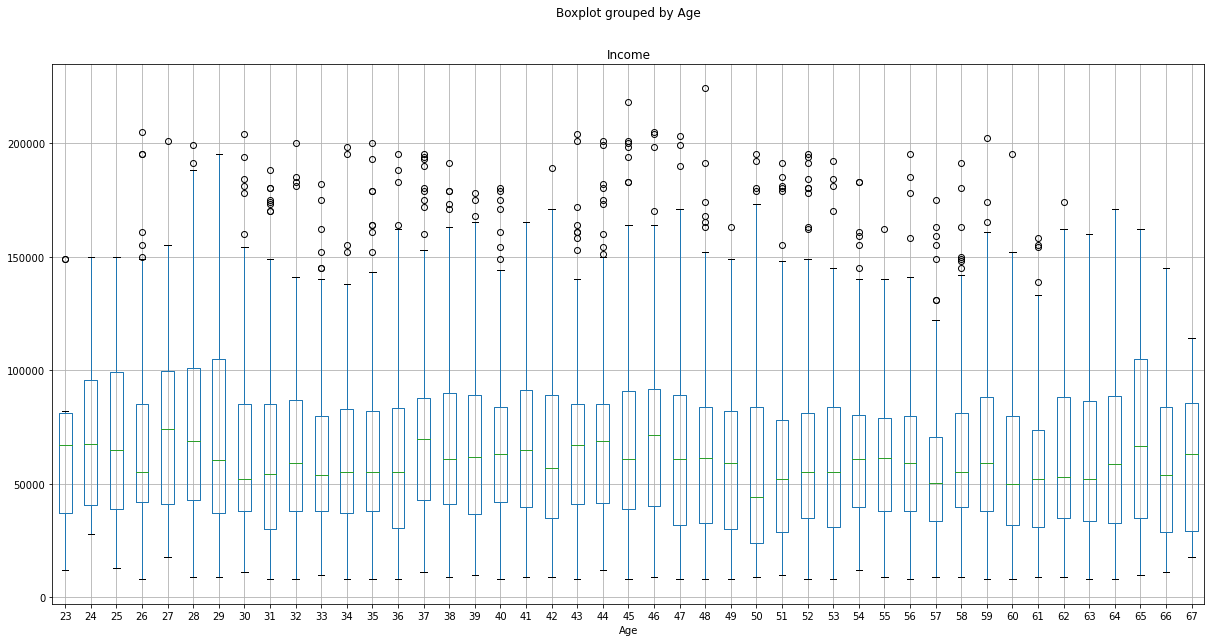

In [34]:
bank_loans_N.boxplot("Income", by="Age", figsize=(20, 10))
plt.savefig("data/cleaned_data/loan_no_income_boxplot")

In [35]:
bank_loans_edu = bank_loans[bank_loans['Personal Loan'] == 'Yes']['Education Level'].value_counts()
bank_loans_edu

Advanced/Professional    205
Graduate                 182
Undergrad                 93
Name: Education Level, dtype: int64

In [36]:
bank_loans_ed = bank_loans[bank_loans['Personal Loan'] == 'No']['Education Level'].value_counts()
bank_loans_ed

Undergrad                2003
Advanced/Professional    1296
Graduate                 1221
Name: Education Level, dtype: int64

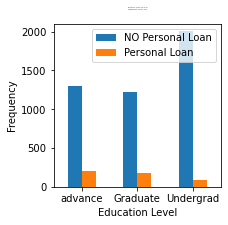

In [48]:
pd.DataFrame(dict(NO_PL= bank_loans_ed, yes_PL= bank_loans_edu)).plot.bar(figsize = (3,3))
plt.ylabel('Frequency')
plt.xlabel('Education Level')
plt.xticks(np.arange(3),('advance','Graduate','Undergrad'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'))
plt.title('Distribution of "Personal Loan" Values \n among Groups of "Education" Values', fontsize = 1, y = 1.05);
plt.savefig('distribution_PL_among_Education.png', bbox_inches = 'tight')

In [38]:
bank_loans_edu_1 = bank_loans[bank_loans['Personal Loan'] == 'Yes']['Education Level'].value_counts()
bank_loans_edu_1

Advanced/Professional    205
Graduate                 182
Undergrad                 93
Name: Education Level, dtype: int64

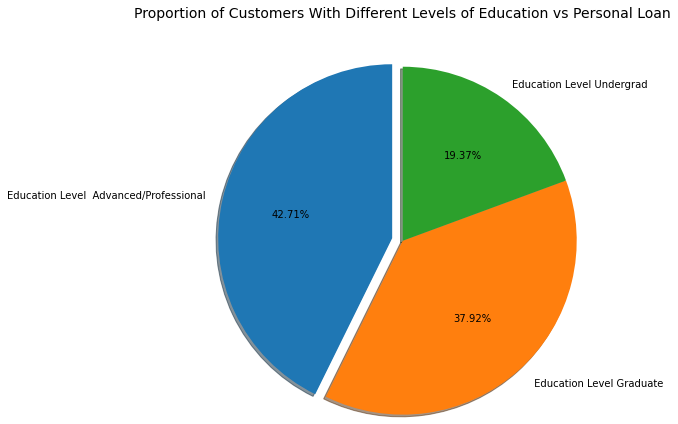

In [39]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education vs Personal Loan',
          fontsize = 14, y = 1.3)
labels = ['Education Level  Advanced/Professional',' Education Level Graduate ','Education Level Undergrad']
plt.pie(bank_loans_edu_1, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_Personal_Loan.png', bbox_inches = 'tight');

In [40]:
Family_size = bank_loans[bank_loans['Personal Loan'] == 'Yes']['Family Size'].value_counts()
Family_size

4    134
3    133
1    107
2    106
Name: Family Size, dtype: int64

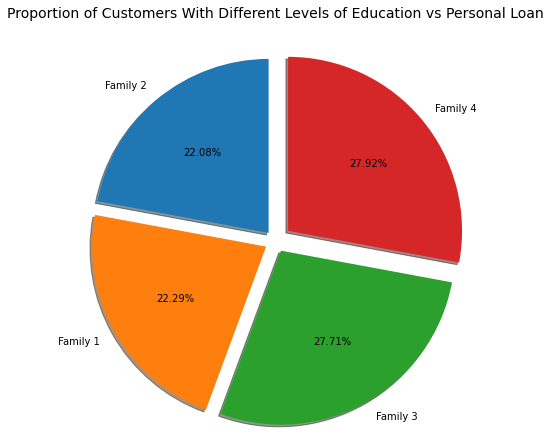

In [41]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education vs Personal Loan',
          fontsize = 14, y = 1.3)
labels = ['Family 2',' Family 1','Family 3','Family 4']
plt.pie(Family_size.sort_values(ascending = True), labels = labels, \
        autopct= '%1.2f%%', shadow = True, explode = (0.1, 0.1, 0.1,0.15), radius = 1.6, startangle = 90);
plt.savefig('Proportion_family_size_among_PL.png', bbox_inches = 'tight');

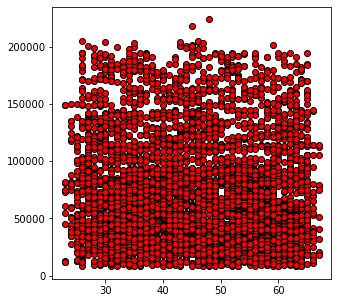

In [42]:
plt.scatter(x_axis_age, y_axix_income, marker="o", facecolors="red", edgecolors="black")
plt.savefig("data/cleaned_data/scatter_age_income_boxplot")

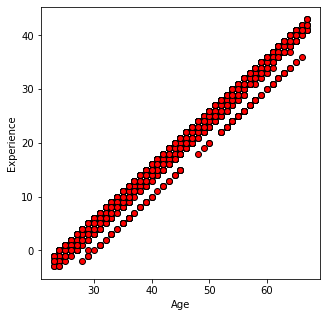

In [46]:
plt.scatter(x_axis_age, Experience, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Age')
plt.ylabel('Experience')
plt.savefig("data/cleaned_data/scatter_age_experience_boxplot")

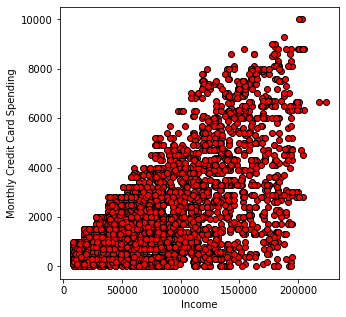

In [45]:
plt.scatter(y_axix_income, Credit_card, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Income')
plt.ylabel('Monthly Credit Card Spending')
plt.savefig("data/cleaned_data/scatter_credit_card_income_boxplot")